In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the communication topology for followers
follower_topology =  {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

# Define the communication topology for leaders
leader_topology = {0: [0], 1: [1], 2: [2], 3: [], 4: [], 5: []}

# Create the communication topology matrix
communication_topology = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    neighbors = follower_topology[i]
    for neighbor in neighbors:
        communication_topology[i, neighbor] = 1

# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(communication_topology, axis=1))
laplacian_matrix = degree_matrix - communication_topology

print("Communication Topology Matrix:")
print(communication_topology)

print("\nLaplacian Matrix:")
print(laplacian_matrix)

# Create A0
A0 = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    leaders = leader_topology[i]
    A0[i, i] = len(leaders)

print("\nA0:")
print(A0)

L1=laplacian_matrix+A0
print("\nL1:")
print(L1)

# Create L2
L2 = np.zeros((num_followers, num_leaders))
for i in range(num_followers):
    leaders = leader_topology[i]
    for leader in leaders:
        L2[i, leader] = -1

print("\nL2:")
print(L2)


Communication Topology Matrix:
[[0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Laplacian Matrix:
[[ 2. -1.  0. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

A0:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

L1:
[[ 3. -1.  0. -1.  0.  0.]
 [-1.  3. -1.  0.  0.  0.]
 [ 0. -1.  2.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

L2:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [18]:
# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)
print(follower_positions)
print(leader_positions)



[[5.4812789  2.78083834]
 [0.35765092 1.00712842]
 [6.04018467 6.6083113 ]
 [6.14264087 4.46517926]
 [5.92748307 5.69760623]
 [9.7092909  9.40731213]]
[[3.25710749 4.25551678]
 [9.2202391  3.57830357]
 [4.7740077  6.42048046]]


In [19]:
from scipy.integrate import solve_ivp

def matrix_differential_equation(tt, X):
    X = X.reshape([num_followers, 2])
    cols=np.shape(X)[1]
    # print(cols)
    dX_dt = np.zeros((num_followers, cols))
    for i in range(cols):
        dX_dt[:,i] = - np.dot(L1,X[:,i]) - np.dot(L2,leader_positions[:,i])
    # print(dX_dt)
    dX_dt = dX_dt.reshape([1,num_followers*2])
    return dX_dt


t_sum=15 # 秒
t_span = (0, t_sum)  # 时间范围
t = np.linspace(0, t_sum, num_iterations)  # 用于绘制的时间点

# 微分方程的初值
X=follower_positions.reshape([1,num_followers*2])
print(X)

initial_condition = X[0]  # 初始条件
print(initial_condition)
solution = solve_ivp(matrix_differential_equation, t_span, initial_condition, dense_output=True)

Y = solution.sol(t)
print(len(t))
Y[:,1].reshape([num_followers, 2])

[[5.4812789  2.78083834 0.35765092 1.00712842 6.04018467 6.6083113
  6.14264087 4.46517926 5.92748307 5.69760623 9.7092909  9.40731213]]
[5.4812789  2.78083834 0.35765092 1.00712842 6.04018467 6.6083113
 6.14264087 4.46517926 5.92748307 5.69760623 9.7092909  9.40731213]
100


array([[4.8197928 , 3.03005963],
       [2.6503893 , 2.18678898],
       [5.30204976, 5.93873299],
       [6.01179658, 4.4440687 ],
       [6.40518807, 5.9835157 ],
       [9.2147979 , 8.90824443]])

<IPython.core.display.Javascript object>


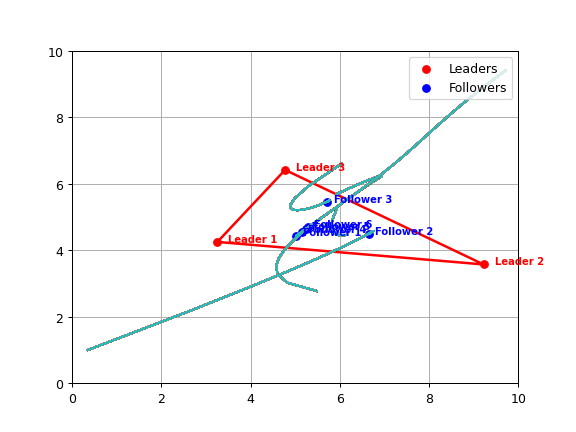

In [29]:
# Visualization setup
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

leader_labels = []
follower_labels = []
for i in range(num_leaders):
    leader_labels.append(ax.text(leader_positions[i, 0], leader_positions[i, 1], f"Leader {i+1}", ha='center', va='center', color='r', fontsize=8, fontweight='bold'))
for i in range(num_followers):
    follower_labels.append(ax.text(follower_positions[i, 0], follower_positions[i, 1], f"Follower {i+1}", ha='center', va='center', color='b', fontsize=8, fontweight='bold'))

ax.legend(loc='upper right')

for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
        plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()

# Function to update the plot in each animation frame
def update(frame):
    follower_positions=Y[:,frame].reshape([num_followers, 2])

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Update labels
    for i in range(num_leaders):
        leader_labels[i].set_position((leader_positions[i, 0] + 0.8, leader_positions[i, 1] + 0.1))
    for i in range(num_followers):
        follower_labels[i].set_position((follower_positions[i, 0] + 0.8, follower_positions[i, 1] + 0.1))

    # Calculate the convex hull for leaders only
    hull = ConvexHull(leader_positions)
    hull_vertices = np.append(hull.vertices, hull.vertices[0])  # Closing the hull by connecting the first vertex again
    hull_line.set_xdata(leader_positions[hull_vertices, 0])
    hull_line.set_ydata(leader_positions[hull_vertices, 1])

    return leader_scatter, follower_scatter, hull_line, *leader_labels, *follower_labels

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200, blit=True)

# Save the animation as a gif
ani.save('multi_agent_containment.gif', writer='pillow')


In [28]:
for k in range(num_followers):
    x=[]
    y=[]
    for i in range(num_iterations):
        x.append(Y[:,i].reshape([num_followers, 2])[k,0])
        y.append(Y[:,i].reshape([num_followers, 2])[k,1]) 
        plt.plot(x, y)
# Show the plot
plt.grid(True)
plt.show()